# Taller 04
## Ajuste de curvas por mínimos cuadrados
## Jonathan Paredes


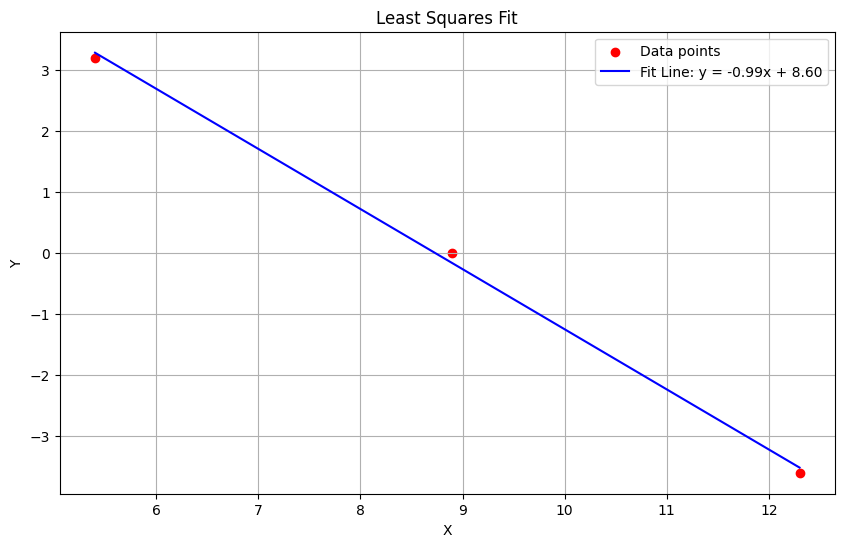

interactive(children=(FloatSlider(value=8.9, description='p2_x', max=12.3, min=5.5), FloatSlider(value=0.0, de…

In [11]:
import matplotlib.pyplot as plt
from ipywidgets import interact

p1 = (5.4, 3.2)
p2_i = (9.5, 0.7) 
p3 = (12.3, -3.6)

def least_squares(x_coords, y_coords):
    """Calcula m y b usando mínimos cuadrados."""
    n = len(x_coords)
    sum_x = sum(x_coords)
    sum_y = sum(y_coords)
    sum_xy = sum(x * y for x, y in zip(x_coords, y_coords))
    sum_x2 = sum(x ** 2 for x in x_coords)
    
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    b = (sum_y - m * sum_x) / n
    return m, b

def update_plot(p2_x, p2_y):
    x_coords = [p1[0], p2_x, p3[0]]
    y_coords = [p1[1], p2_y, p3[1]]
    
    m, b = least_squares(x_coords, y_coords)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_coords, y_coords, color="red", label="Data points")
    
    x_line = [min(x_coords), max(x_coords)]
    y_line = [m * x + b for x in x_line]
    plt.plot(x_line, y_line, color="blue", label=f"Fit Line: y = {m:.2f}x + {b:.2f}")
    
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Least Squares Fit")
    plt.legend()
    plt.grid()
    plt.show()

_ = interact(update_plot, p2_x=(5.5, 12.3, 0.1), p2_y=(-10.0, 10.0, 0.1))
